In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import os.path as path
import wget

In [2]:
def LoadFiles(file,url):
    if not path.exists(file):
        Path_ = wget.download(url,file)
        print('File loaded')
    else:
        Path_ = file
        
    return Path_

In [3]:
file = 'Data/Do.wav'
url = 'https://github.com/asegura4488/DataBase/blob/main/MetodosComputacionales/Do.wav'
file1 = 'Data/Sol.wav'
url1 = 'https://github.com/asegura4488/DataBase/blob/main/MetodosComputacionales/Sol.wav'

In [27]:
Path1 = LoadFiles(file,url)
Path2 = LoadFiles(file1,url)

In [28]:
print(Path1)

Data/Do.wav


In [29]:
rated, do = wav.read(Path1)
rates, sol = wav.read(Path2)

In [30]:
Frecuenciasdo = np.arange(0, do.shape[0]//2 + 1)
Frecuenciassol = np.arange(0, sol.shape[0]//2 + 1)

print(len(Frecuenciasdo),len(Frecuenciassol))
diff = len(Frecuenciassol) - len(Frecuenciasdo)
print(diff)

24801 32001
7200


In [31]:
fftdo = np.fft.rfft(do)
fftsol = np.fft.rfft(sol)

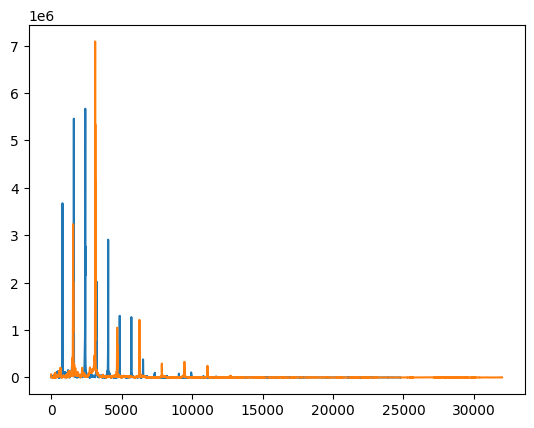

In [32]:
plt.plot(Frecuenciasdo, np.abs(fftdo))
plt.plot(Frecuenciassol, np.abs(fftsol))

In [33]:
# Debemos agregar ceros para que las dos notas tengan el mismo size
aux = np.zeros(diff)

fftdo = np.concatenate((fftdo,aux))
print(len(fftdo))

32001


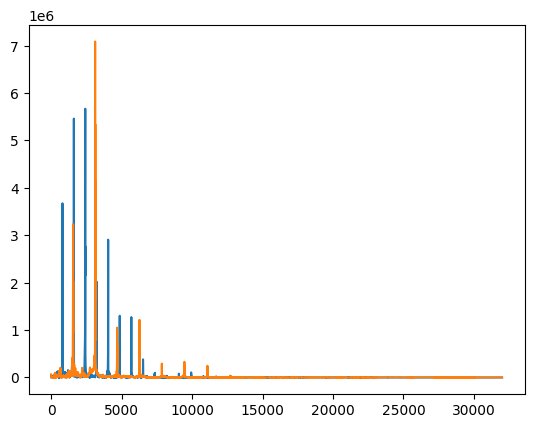

In [34]:
plt.plot(Frecuenciassol, np.abs(fftdo))
plt.plot(Frecuenciassol, np.abs(fftsol))

In [35]:
# Construyendo mascara
mask = Frecuenciassol < 5000 
mask1 = Frecuenciassol < 1000 

In [36]:
fftdo[mask] = 0.
fftsol[mask1] = 0.  # Hacemos estos modos igual a cero

In [37]:
NewfeqDo = np.arange(len(fftdo))

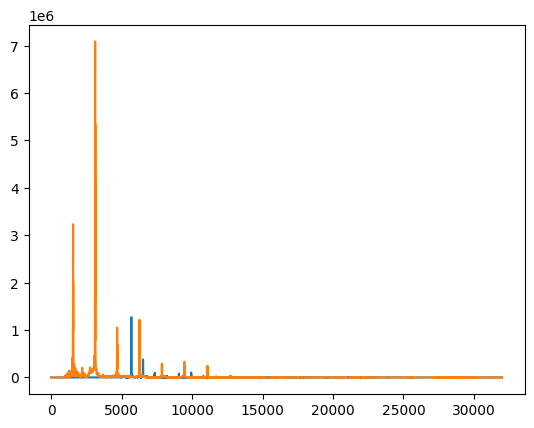

In [38]:
plt.plot(NewfeqDo,np.abs(fftdo))
plt.plot(NewfeqDo,np.abs(fftsol))

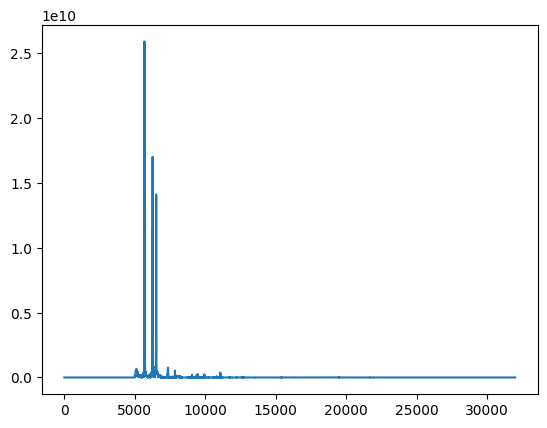

In [39]:
# Ahora realizamos convolucion
h = fftdo*fftsol
plt.plot(NewfeqDo,np.abs(h))
plt.savefig('EspectroConvolucion.pdf')

In [40]:
ii = np.argmax(h)
ii_A = np.abs(NewfeqDo) > (NewfeqDo[ii])
ii_B = np.abs(NewfeqDo) < (NewfeqDo[ii])
h[ii_A | ii_B] = 0.

5694


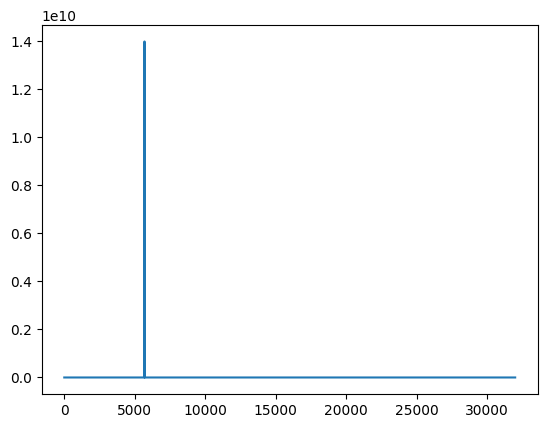

In [41]:
plt.plot(NewfeqDo,np.abs(h))
print(NewfeqDo[ii])

(0.0, 60.0)

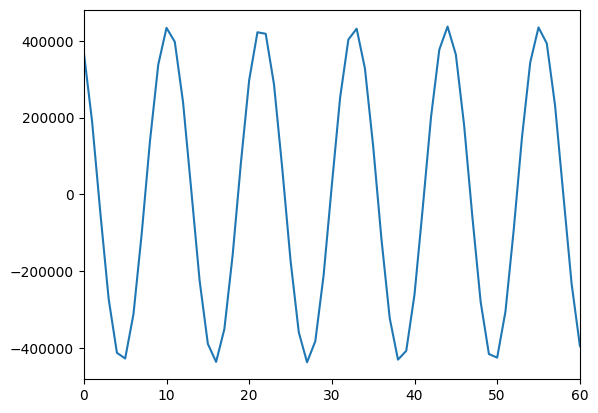

In [42]:
NuevaNota = np.fft.irfft(h)
plt.plot(NuevaNota)
plt.xlim(0,60)

In [43]:
NuevaNota = NuevaNota.astype(np.int16)
wav.write("NuevaNota.wav",rates,NuevaNota)